<a href="https://colab.research.google.com/github/Jiadia22/2025-AI_Application/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/Datazip/week12/salary.csv", skipinitialspace=True)
data # 연봉예측

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [73]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [75]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [76]:
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


범주형 데이터 전처리

In [77]:
data['class'] = data['class'].str.strip().map({'<=50K': 0, '>50K': 1})

In [78]:
data


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [79]:
data['age'].dtype

dtype('int64')

In [80]:
for i in data.columns:
  print(i,data[i].dtype)

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


In [81]:
obj_list = []
for i in data.columns:
  if data[i].dtype == 'object':
    obj_list.append(i)
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [82]:
for i in obj_list:
  print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [83]:
for i in obj_list:
  if data[i].nunique()>=10:
    print(i,data[i].nunique())

education 16
occupation 14
native-country 41


In [84]:
data['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [85]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [86]:
data['education-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

In [87]:
data['education-num']==1

,education-num
0,False
1,False
2,False
3,False
4,False
...,...
48837,False
48838,False
48839,False
48840,False


In [88]:
data[data['education-num']==1]['education'].unique() #educationnum이 1이면 다 preschool이다.

array(['Preschool'], dtype=object)

In [89]:
for i in np.sort(data['education-num'].unique()):
  print(i,data[data['education-num']==i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [90]:
data.drop('education',axis=1,inplace=True)
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [91]:
data['occupation'].value_counts()
#이미 비슷한 것끼리 묶여진 형태. 직업 귀천 없으니까 서열 없음. 숫자로 변환하기 어려움
#다 더미 변수로 고고

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [92]:
data['native-country'].value_counts() #미국이냐 아니냐로 할수도 있

,count
native-country,
United-States,43832
Mexico,951
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [95]:
data.groupby('native-country')[data.select_dtypes(include='number').columns].mean()

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Cambodia,36.892857,9.392857,697.464286,194.821429,42.035714,0.321429
Canada,44.049451,10.692308,1233.505495,131.159341,40.406593,0.346154
China,41.852459,11.262295,1407.737705,170.655738,38.262295,0.295082
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Cuba,46.355072,9.391304,470.543478,62.717391,40.101449,0.246377
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Ecuador,37.666667,9.244444,328.288889,0.000000,39.266667,0.133333
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
England,40.527559,11.110236,1076.551181,108.913386,41.937008,0.370079


In [96]:
data.groupby('native-country')[data.select_dtypes(include='number').columns].mean().sort_values('class')
#네덜란드는 다 연봉 50 미만. 근데 data가 1개여서 패쓰
#비슷한 국가 별로 비슷하지 않아서 묶는거 별로임

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


In [97]:
#DT는 변수별로 정규화 필요 없음.
country_group = data.groupby('native-country')[data.select_dtypes(include='number').columns].mean().sort_values('class')

In [98]:
country_group.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544


In [99]:
country_group = country_group.reset_index()

In [100]:
country_group

,native-country,age,education-num,capital-gain,capital-loss,hours-per-week,class
0,Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
1,Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
2,Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
3,Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
4,Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
5,Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
6,Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
7,El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
8,Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074
9,Vietnam,34.616279,9.616279,604.802326,86.372093,37.976744,0.081395


In [101]:
data = data.merge(country_group,on='native-country',how='left' )

In [102]:
data #국가를 class_y로 대체 가

,age_x,workclass,education-num_x,marital-status,occupation,relationship,race,sex,capital-gain_x,capital-loss_x,hours-per-week_x,native-country,class_x,age_y,education-num_y,capital-gain_y,capital-loss_y,hours-per-week_y,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977


In [103]:
data.drop('native-country',axis=1,inplace=True)

In [105]:
data = data.rename(columns = {'class_x':'class','class_y':'native-country'})

In [106]:
data

,age_x,workclass,education-num_x,marital-status,occupation,relationship,race,sex,capital-gain_x,capital-loss_x,hours-per-week_x,class,age_y,education-num_y,capital-gain_y,capital-loss_y,hours-per-week_y,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,38.69869,10.168667,1089.626529,88.789743,40.440774,0.243977


결측치 처리 & 더미변수

In [107]:
data.isna()

,age_x,workclass,education-num_x,marital-status,occupation,relationship,race,sex,capital-gain_x,capital-loss_x,hours-per-week_x,class,age_y,education-num_y,capital-gain_y,capital-loss_y,hours-per-week_y,native-country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [108]:
data.isna().mean() #true가 1

,0
age_x,0.000000
workclass,0.057307
education-num_x,0.000000
marital-status,0.000000
occupation,0.057512
relationship,0.000000
race,0.000000
sex,0.000000
capital-gain_x,0.000000
capital-loss_x,0.000000


In [109]:
data.drop(['age_y','education-num_y','capital-gain_y','capital-loss_y','hours-per-week_y'],axis=1,inplace=True)

In [110]:
data.isna().mean()

,0
age_x,0.000000
workclass,0.057307
education-num_x,0.000000
marital-status,0.000000
occupation,0.057512
relationship,0.000000
race,0.000000
sex,0.000000
capital-gain_x,0.000000
capital-loss_x,0.000000


In [113]:
data = data.rename(columns = {'age_x':'age',
 'education-num_x':'education-num',
 'capital-gain_x':'capital-gain',
 'capital-loss_x':'capital-loss',
 'hours-per-week_x':'hours-per-week'})

In [115]:
data.isna().mean()

,0
age,0.000000
workclass,0.057307
education-num,0.000000
marital-status,0.000000
occupation,0.057512
relationship,0.000000
race,0.000000
sex,0.000000
capital-gain,0.000000
capital-loss,0.000000


In [116]:
data['native-country'] = data['native-country'].fillna(-99)
#연봉이 전혀 없는 -99 (일종의 약속)

In [117]:
data['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [120]:
data['workclass']= data['workclass'].fillna('Private')

In [121]:
data['workclass'].value_counts()

,count
workclass,
Private,36705
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [122]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [123]:
data['occupation']= data['occupation'].fillna('Unknown')

In [124]:
data=pd.get_dummies(data,drop_first=True)

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('class',axis=1),data['class'],test_size=0.2,random_state=100)

In [137]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8258777766403931

파라미터 튜닝으로 정확도 높여보자

In [139]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [140]:
print('Train score:',accuracy_score(y_train,train_pred))
print('Test score:',accuracy_score(y_test,test_pred))
#오버피팅

Train score: 0.9742277275868246
Test score: 0.826696693622684


In [141]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [143]:
print('Train score:',accuracy_score(y_train,train_pred))
print('Test score:',accuracy_score(y_test,test_pred))

Train score: 0.8527627773654441
Test score: 0.8512642030914116


In [144]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [145]:
print('Train score:',accuracy_score(y_train,train_pred))
print('Test score:',accuracy_score(y_test,test_pred))

Train score: 0.8587515675786349
Test score: 0.8569966219674481


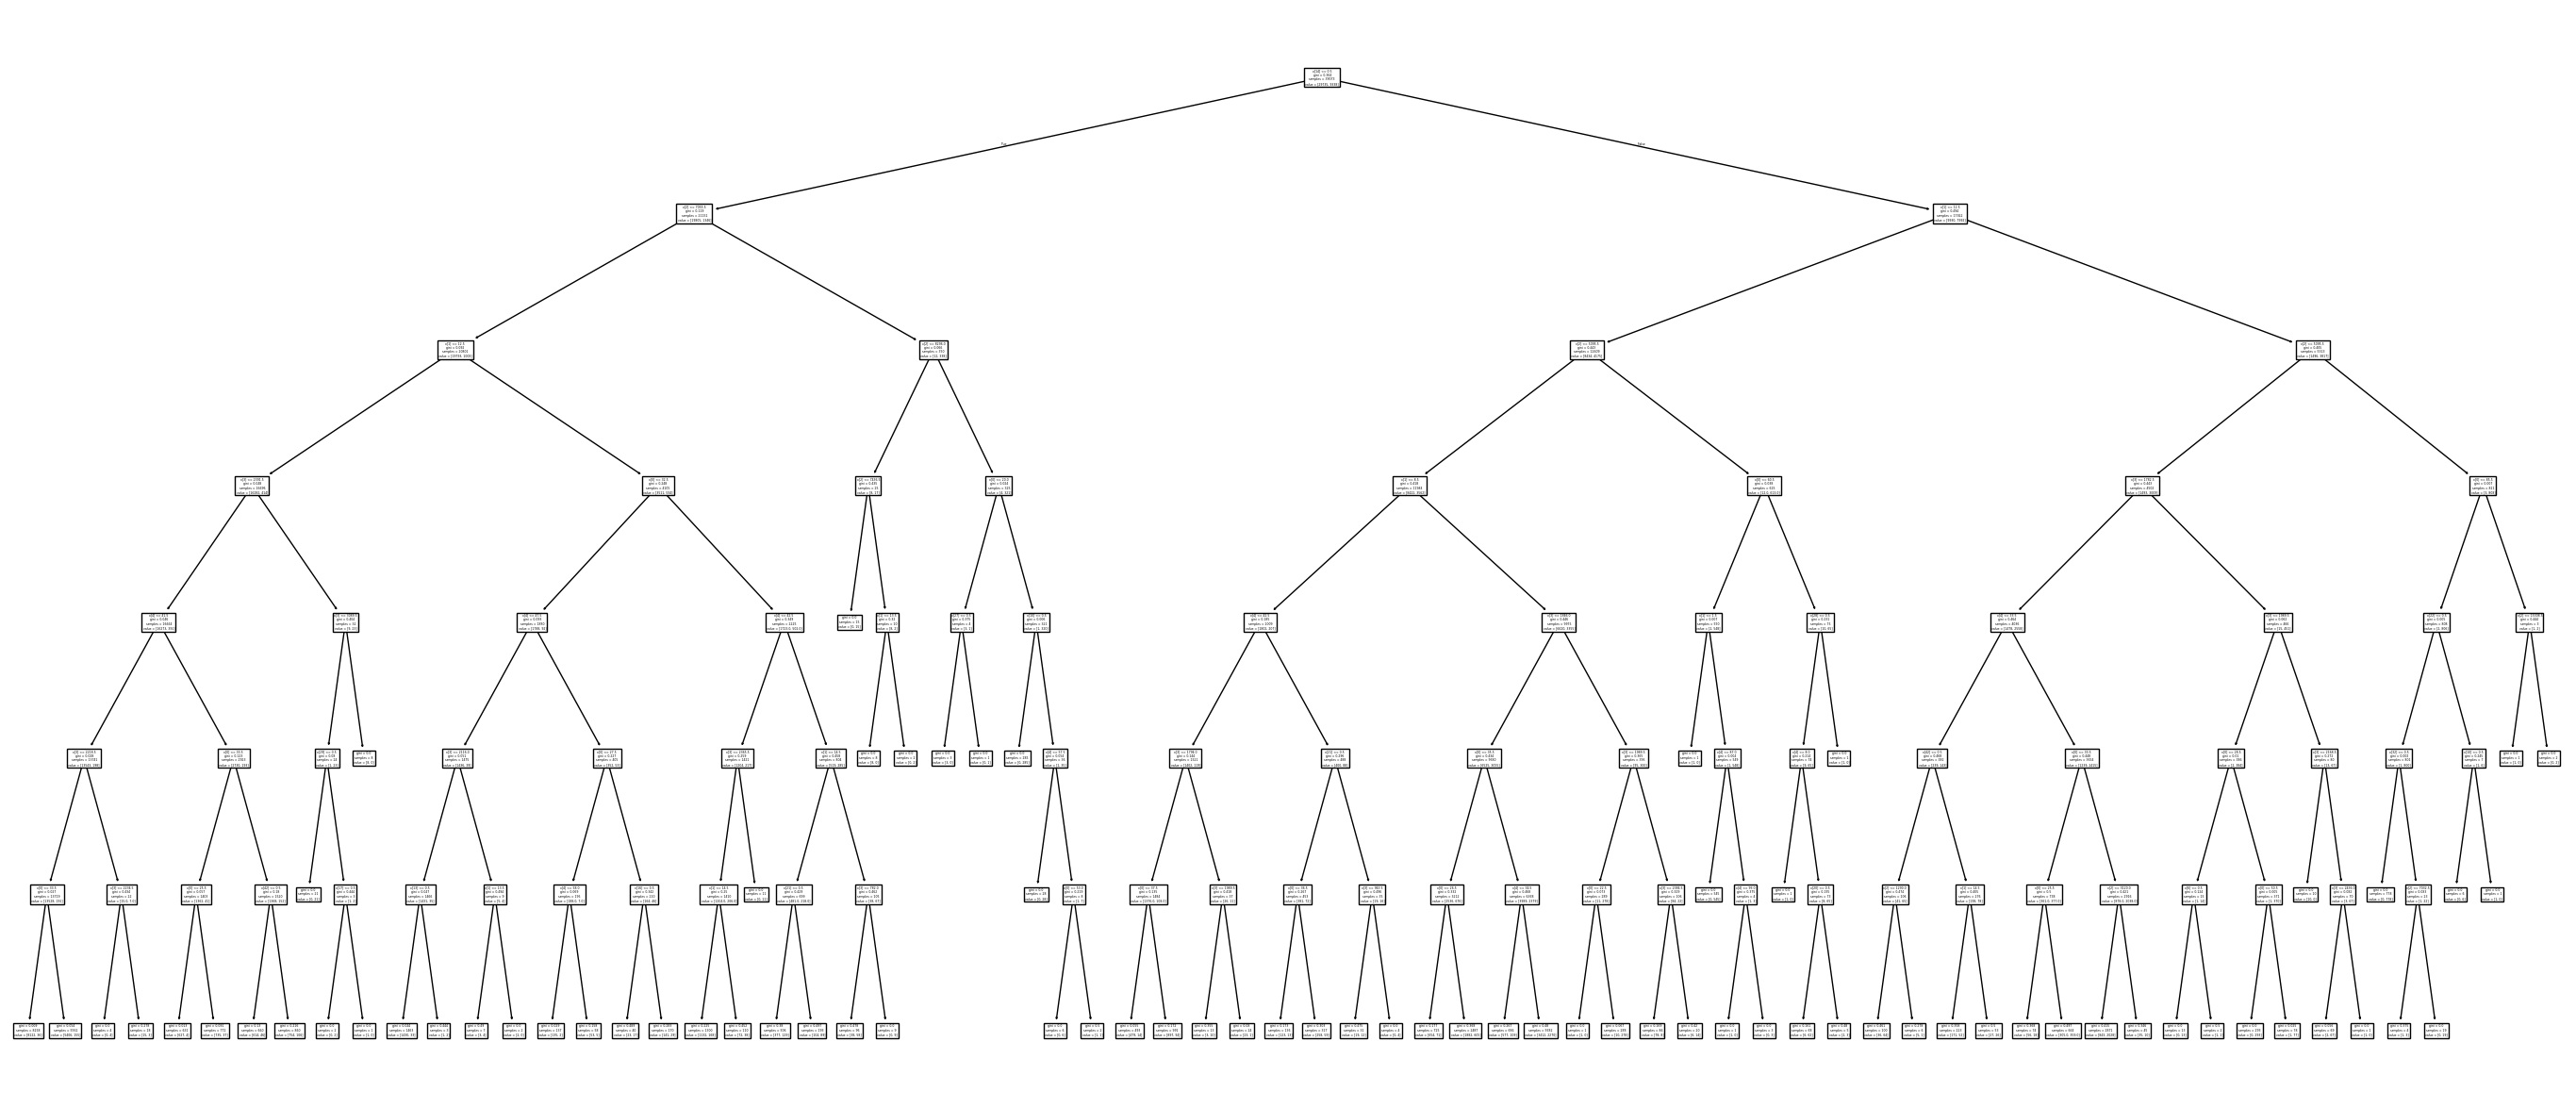

In [146]:
from sklearn.tree import plot_tree
plt.figure(figsize=(35,15))
plot_tree(model)
plt.show()

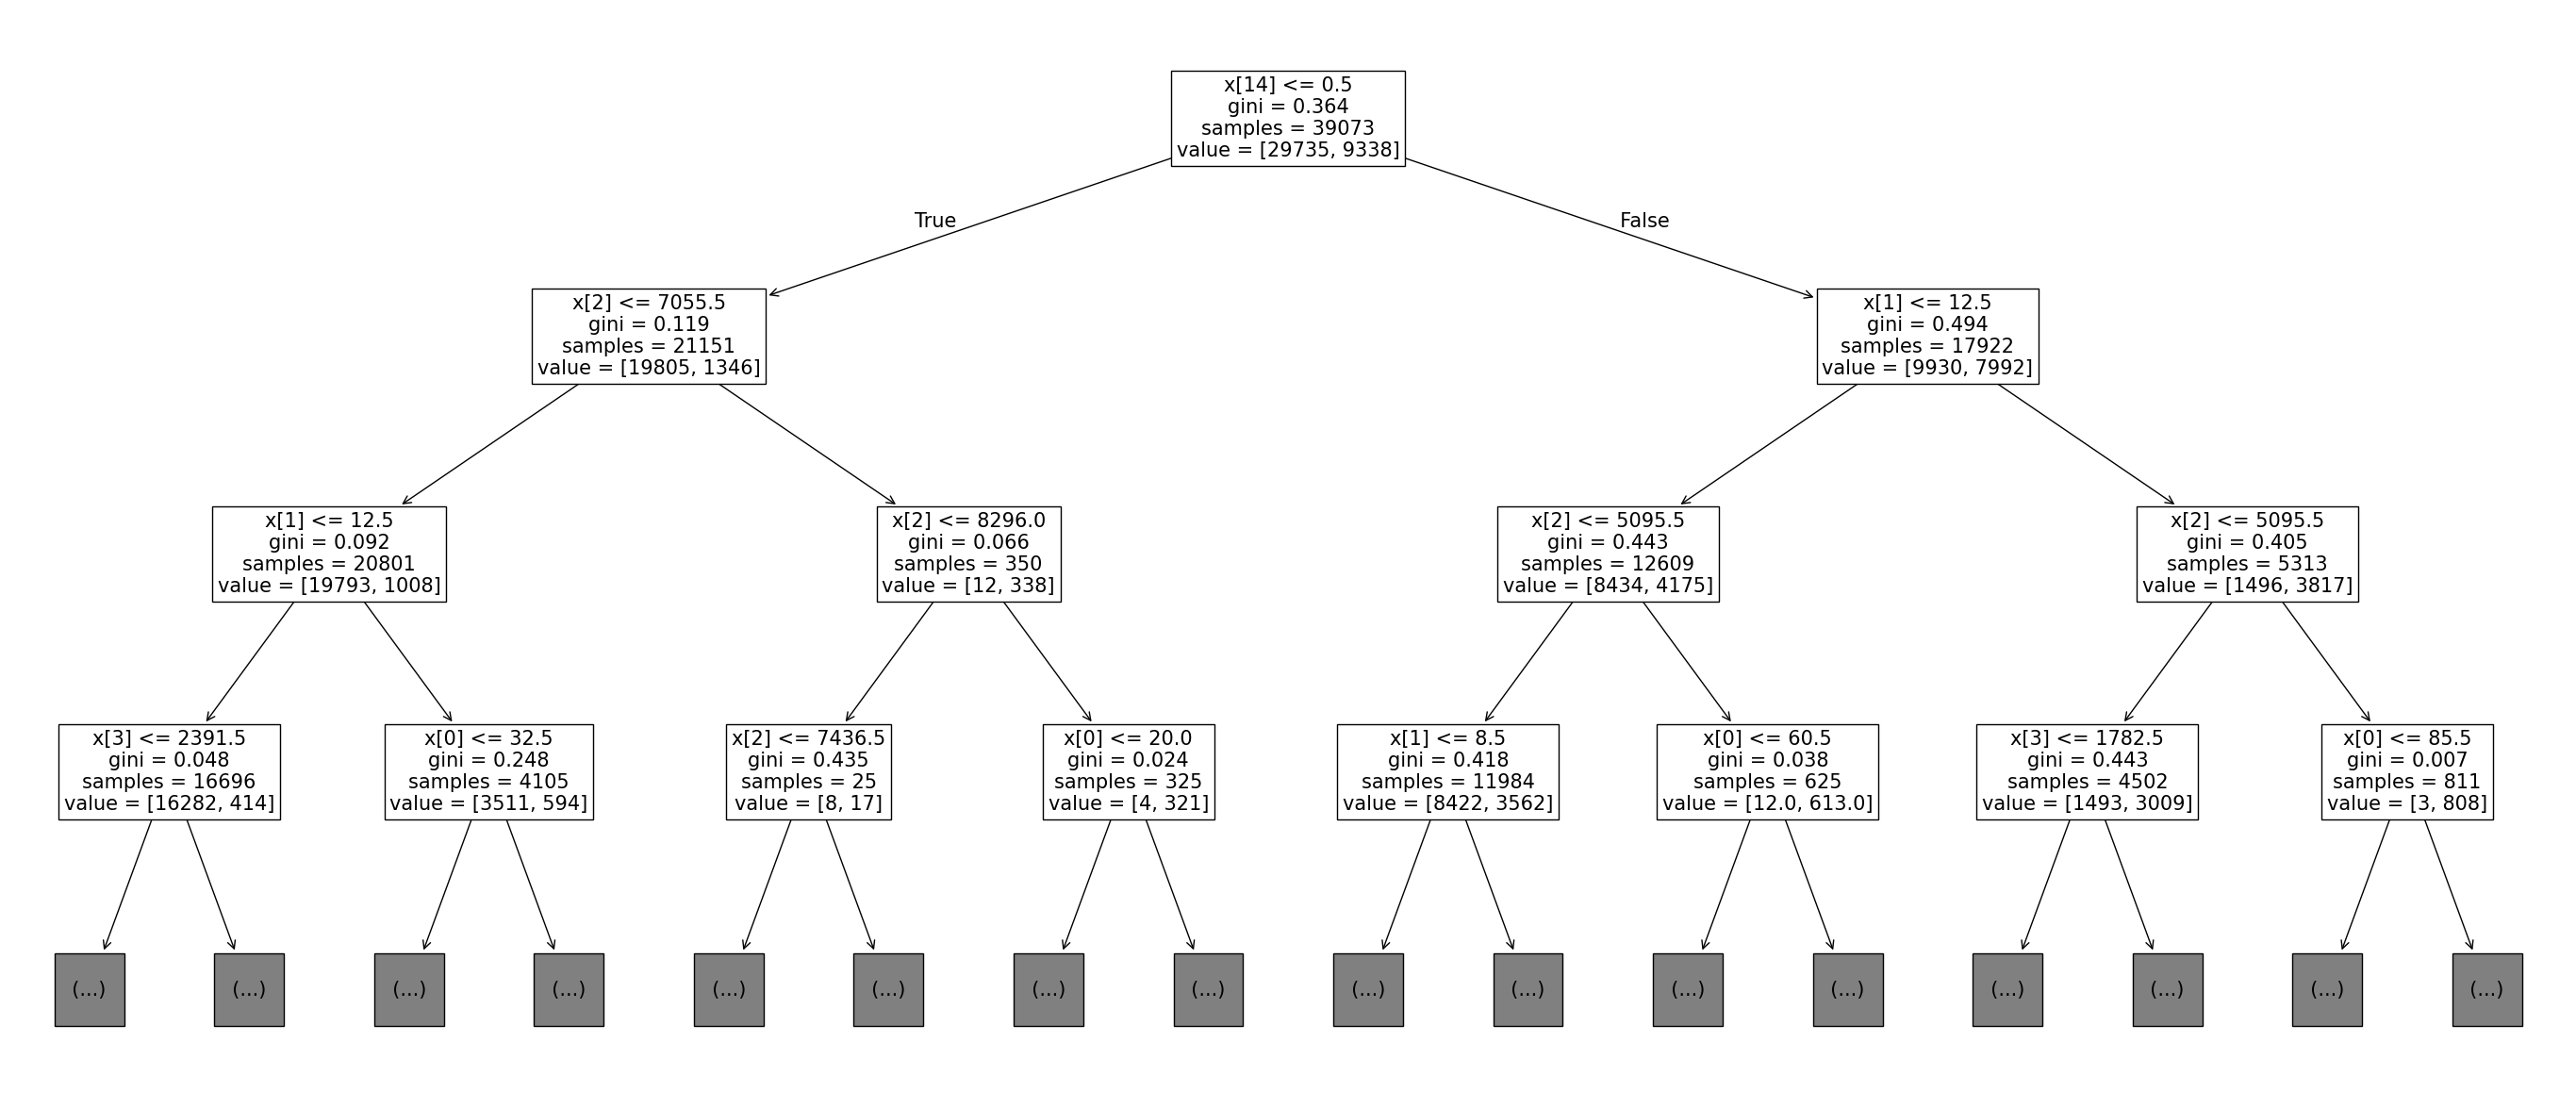

In [147]:
plt.figure(figsize=(35,15))
plot_tree(model,max_depth=3,fontsize=15)
plt.show()

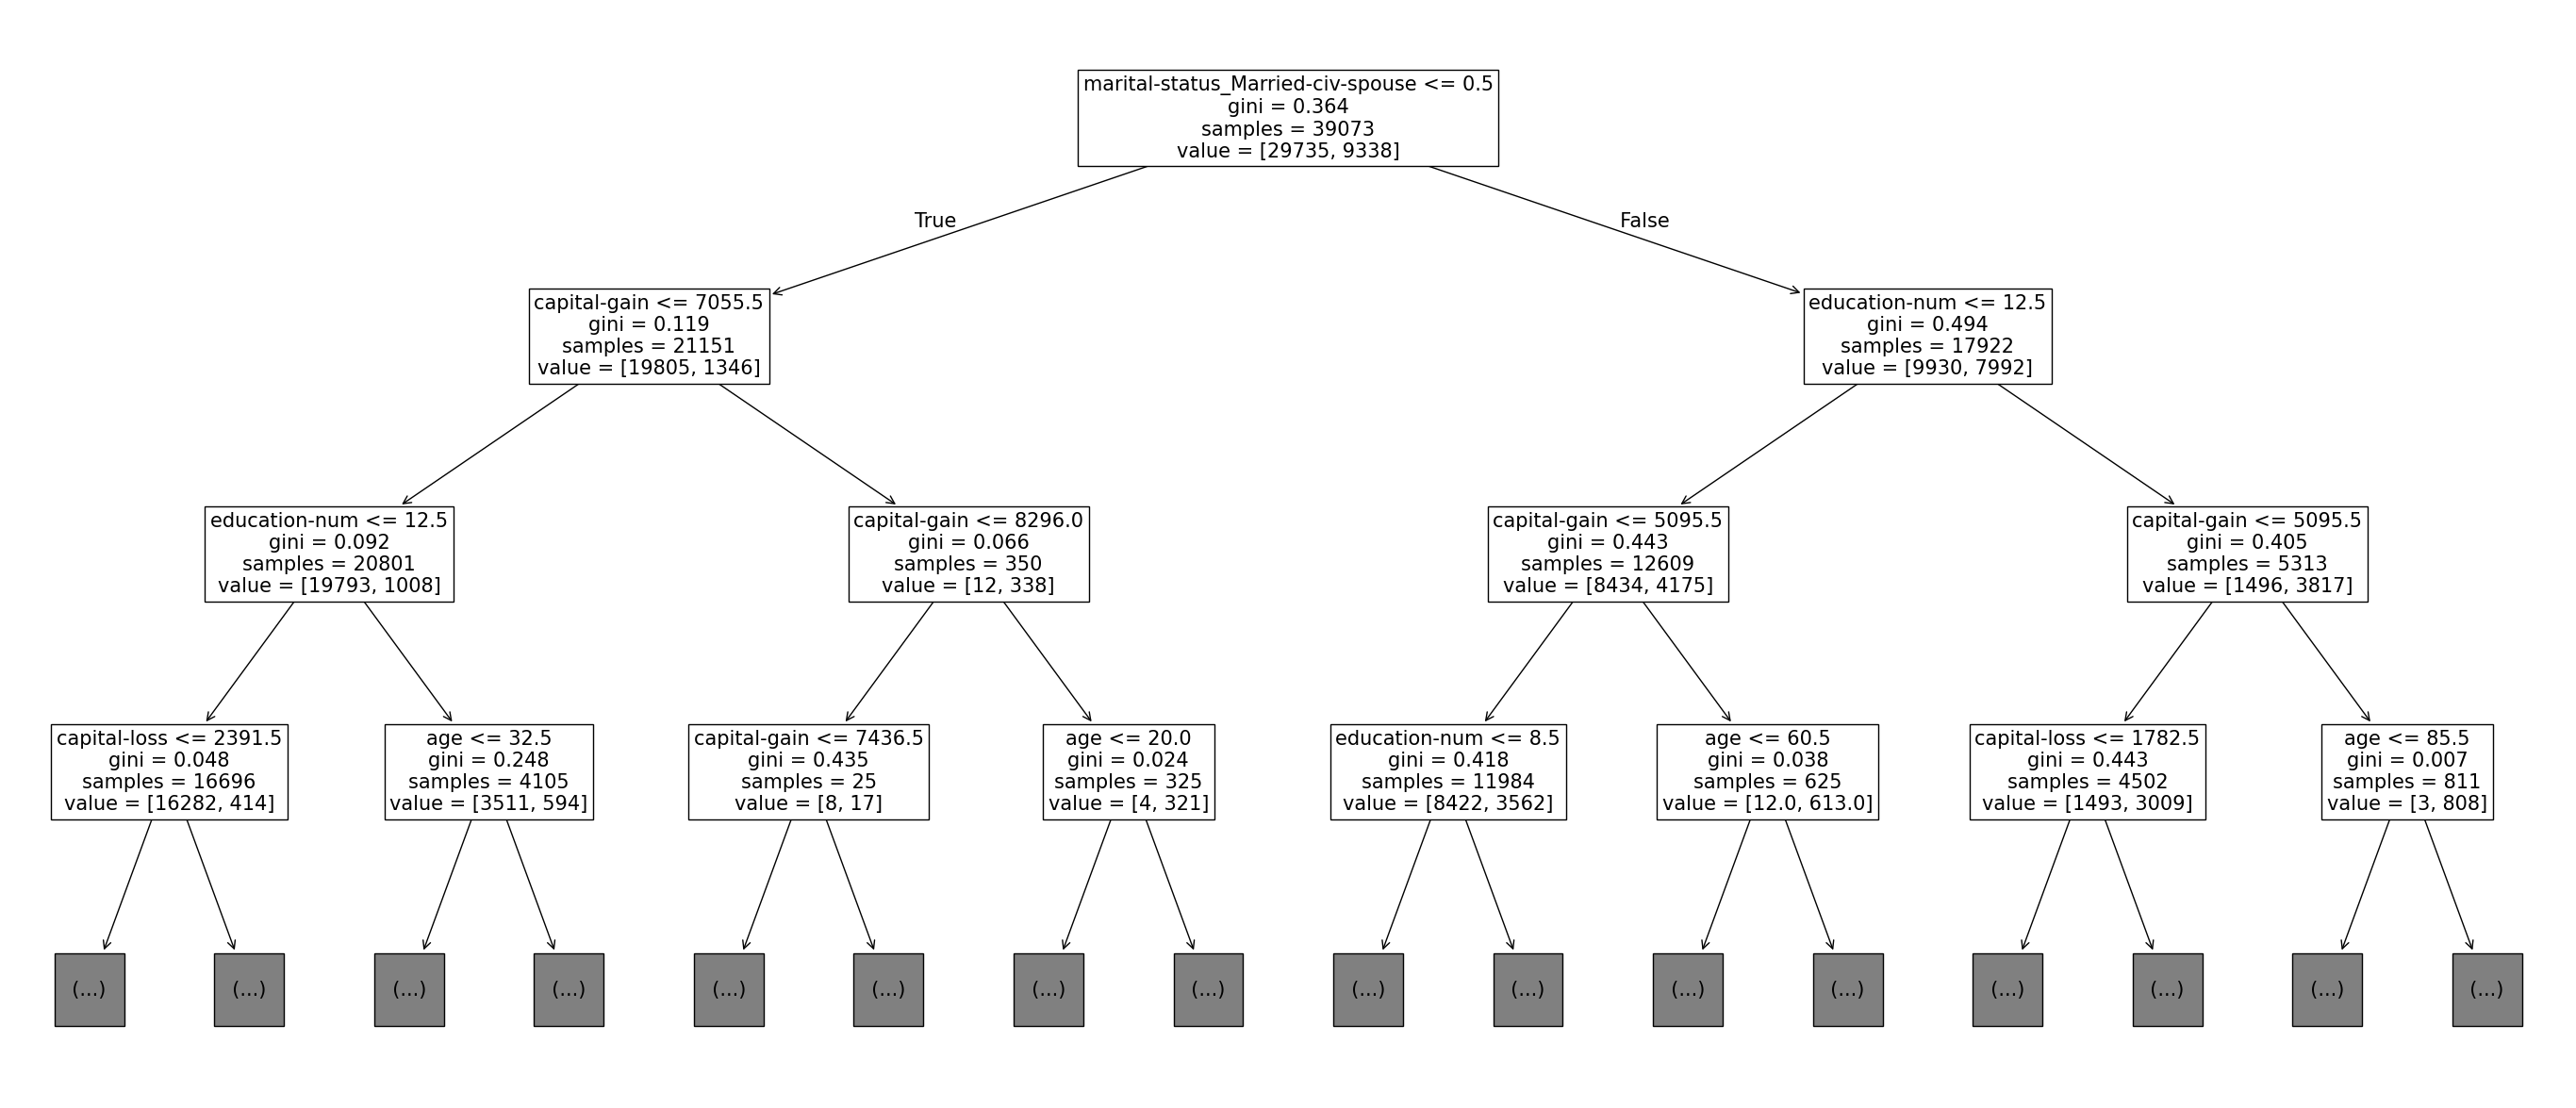

In [148]:
plt.figure(figsize=(35,15))
plot_tree(model,max_depth=3,fontsize=15,feature_names = X_train.columns)
plt.show()